In [ ]:
import matplotlib.pyplot as plt

DPI = 300

#Valori in cm
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

#impostazione della dimesione dei font
plt.rcParams.update({'font.size': 8})

#np.random.seed(10)

In [ ]:
#Scarichiamo il dataset Mnist attraverso il modulo di sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", cache=True)

print(mnist.data.shape)
print(mnist.target.shape)

#Suddividiamo il dataset in variabili di input e di output
X = mnist.data
y = mnist.target 

(70000, 784)
(70000,)


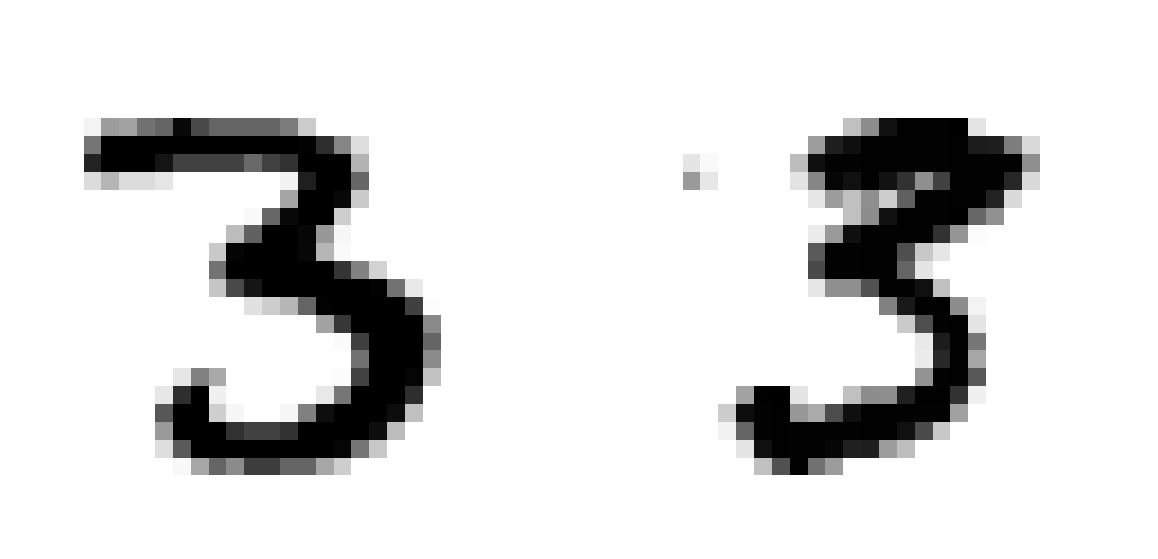

In [ ]:
esempio_image = X[12].reshape(28,28)
esempio2_image = X[49].reshape(28,28)

import matplotlib.pyplot as plt

fs=(cm2inch(12,6))
fig, ax=plt.subplots(figsize=fs, dpi=DPI, nrows=1, ncols=2)
ax[0].axis('off')
ax[1].axis('off')
ax[0].imshow(esempio_image, cmap = 'gray_r')
ax[1].imshow(esempio2_image, cmap = 'gray_r')
fig.savefig('3.1.png')
plt.show()

In [ ]:
#Suddividiamo il dataset in training_set e validation set 
from sklearn.model_selection import train_test_split
train_img, val_img, train_lbl, val_lbl = train_test_split(mnist.data, mnist.target, test_size=0.15, random_state=0)

In [ ]:
print(train_lbl)

['1' '9' '1' ... '7' '1' '1']


In [ ]:
y_train_3 = (train_lbl == '3')
y_val_3 = (val_lbl == '3')

from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss = 'log', verbose = 1)
logreg.fit(train_img, y_train_3)

-- Epoch 1
Norm: 6610.12, NNZs: 605, Bias: -193.443934, T: 59500, Avg. loss: 89501.720957
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 3938.17, NNZs: 612, Bias: -221.266070, T: 119000, Avg. loss: 13610.047264
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 2886.26, NNZs: 621, Bias: -236.840174, T: 178500, Avg. loss: 8075.774402
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2284.02, NNZs: 621, Bias: -248.452407, T: 238000, Avg. loss: 5725.708098
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 1995.50, NNZs: 624, Bias: -257.760433, T: 297500, Avg. loss: 4389.597406
Total training time: 0.48 seconds.
-- Epoch 6
Norm: 1711.62, NNZs: 626, Bias: -264.748021, T: 357000, Avg. loss: 3644.871718
Total training time: 0.57 seconds.
-- Epoch 7
Norm: 1520.07, NNZs: 630, Bias: -270.825760, T: 416500, Avg. loss: 3041.468379
Total training time: 0.67 seconds.
-- Epoch 8
Norm: 1373.74, NNZs: 631, Bias: -276.131120, T: 476000, Avg. loss: 2669.403872
Total training time: 0.76 seconds.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
#Training accuracy
count = 0
for i in range(len(y_train_3)):
  value = logreg.predict(train_img[[i]])  
  if value == y_train_3[i]: 
    count = count + 1
print(count/len(y_train_3))

#Validation accuracy
count = 0
for i in range(len(y_val_3)):
  value = logreg.predict(val_img[[i]])  
  if value == y_val_3[i]: 
    count = count + 1
print(count/len(y_val_3))

0.9657142857142857
0.9628571428571429


In [ ]:
y_true = y_val_3.tolist().count(True)
y_len = len(y_val_3)
print(y_true/y_len)
print((y_len-y_true)/y_len)

0.10019047619047619
0.8998095238095238


In [ ]:
from sklearn.metrics import precision_score, recall_score

preds = logreg.predict(val_img)
print(precision_score(y_val_3, preds))
print(recall_score(y_val_3, preds))

0.8053505535055351
0.8298479087452472


In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val_3, preds))

[[9237  211]
 [ 179  873]]


In [ ]:
from sklearn.metrics import matthews_corrcoef, f1_score

print(matthews_corrcoef(y_val_3, preds))
print(f1_score(y_val_3, preds))

0.7968574177850248
0.8174157303370787


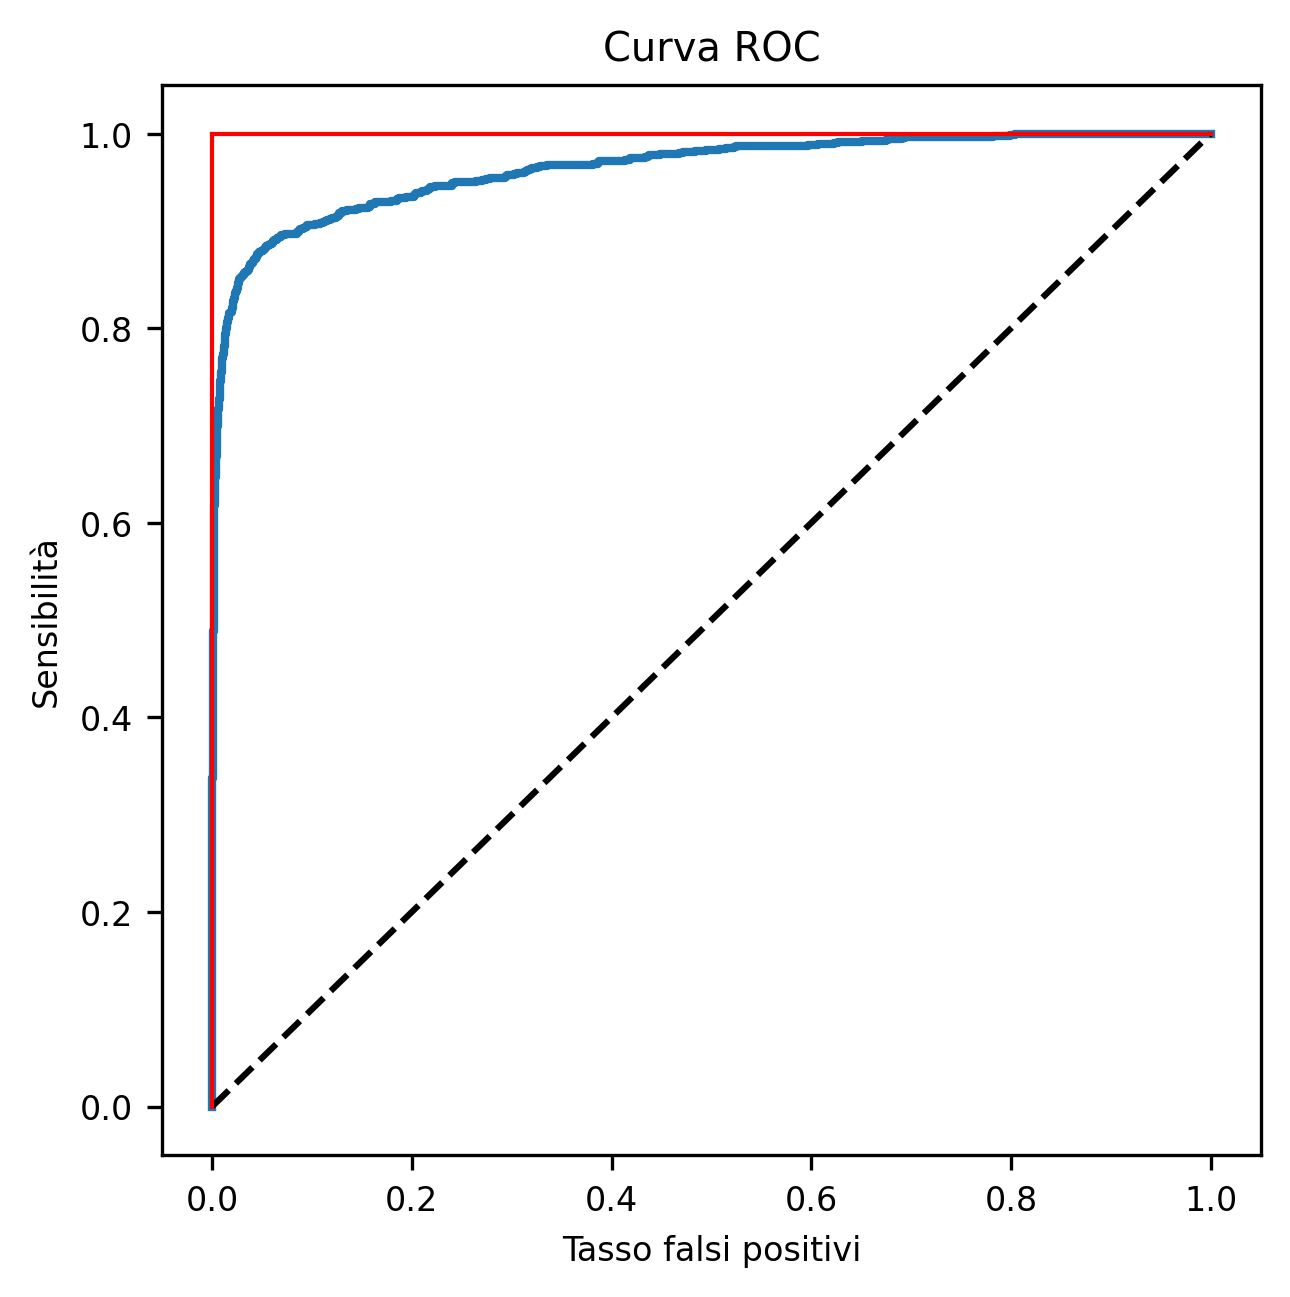

In [ ]:
from sklearn.metrics import roc_curve

scores = logreg.decision_function(val_img)
fpr, tpr, soglie = roc_curve(y_val_3, scores)

fs=(cm2inch(12,12))
fig, ax=plt.subplots(figsize=fs, dpi=DPI)
ax.plot(fpr, tpr, linewidth=2)
ax.plot([0,1],[0,1], 'k--')
ax.plot([0,0],[0,1], linewidth=1, color = 'r')
ax.plot([0,1],[1,1], linewidth=1, color = 'r')
plt.title('Curva ROC')
plt.xlabel('Tasso falsi positivi')
plt.ylabel('Sensibilità')
fig.savefig('3.2.png')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_val_3,scores))

0.9642113485703616


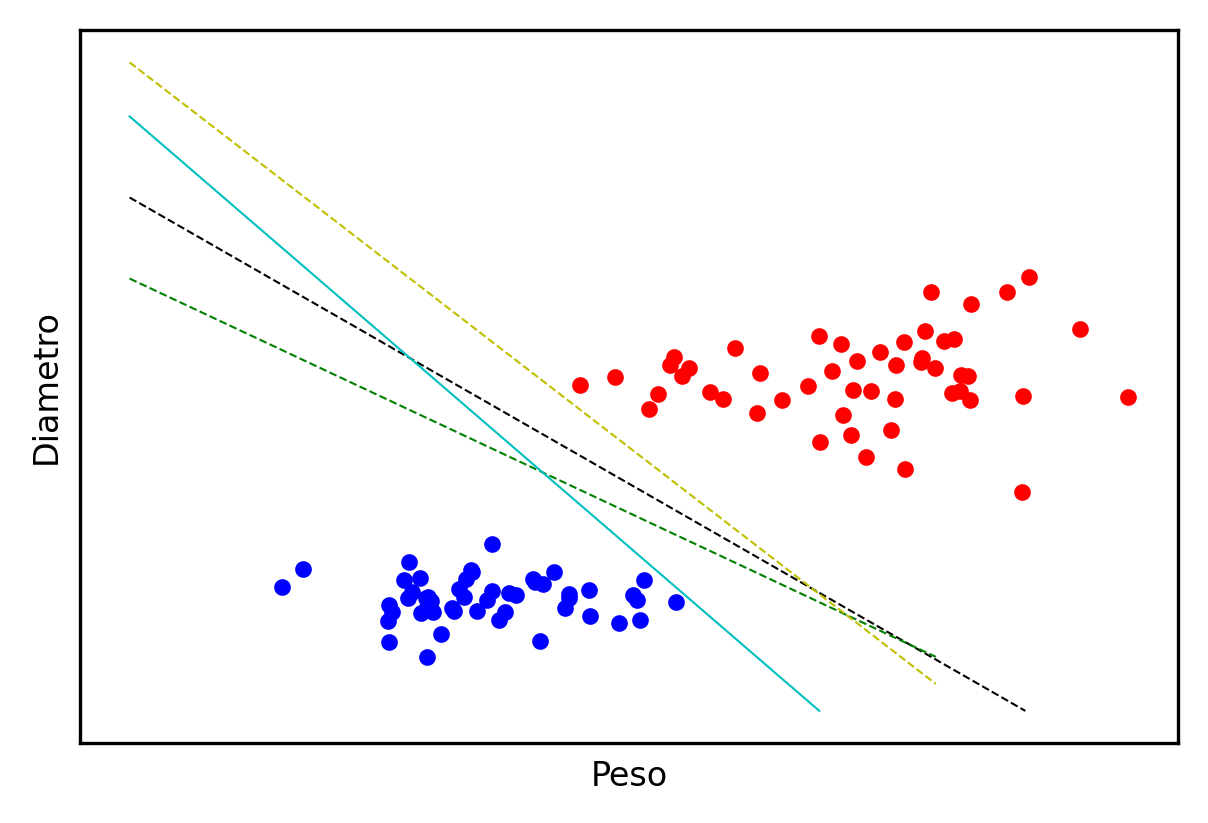

In [ ]:
import numpy as np

np.random.seed(1)

x1_m = np.random.normal(2,0.5,50)
x2_m = np.random.normal(2,0.5,50)
x1_a = np.random.normal(4,0.8,50)
x2_a = np.random.normal(6,0.8,50)


fs=(cm2inch(12,8))
fig, ax=plt.subplots(figsize=fs, dpi=DPI)
ax.plot(x1_m, x2_m, 'b.')
ax.plot(x1_a, x2_a, 'r.')
ax.plot([0,5],[9.5,0], 'k--', linewidth=0.5)
ax.plot([0,4.5],[8,1], 'g--', linewidth=0.5)
ax.plot([0,3.85],[11,0], 'c-', linewidth=0.5)
ax.plot([0,4.5],[12,0.5], 'y--', linewidth=0.5)
plt.xlabel('Peso')
plt.ylabel('Diametro')
plt.xticks([], [])
plt.yticks([], [])
fig.savefig('3.3.png')
plt.show()

In [ ]:
y_train = train_lbl
y_val = val_lbl

#Di default sklearn utilizza la strategia OvO
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss = 'log', verbose = 1)
logreg.fit(train_img, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Output streaming troncato alle ultime 5000 righe.
Norm: 294.43, NNZs: 655, Bias: -43.399413, T: 4224500, Avg. loss: 52.434459
Total training time: 6.30 seconds.
-- Epoch 72
Norm: 292.07, NNZs: 655, Bias: -43.413227, T: 4284000, Avg. loss: 48.139026
Total training time: 6.39 seconds.
-- Epoch 73
Norm: 289.02, NNZs: 655, Bias: -43.443292, T: 4343500, Avg. loss: 50.563249
Total training time: 6.48 seconds.
-- Epoch 74
Norm: 286.55, NNZs: 655, Bias: -43.472957, T: 4403000, Avg. loss: 47.441126
Total training time: 6.57 seconds.
-- Epoch 75
Norm: 285.20, NNZs: 655, Bias: -43.497719, T: 4462500, Avg. loss: 46.859495
Total training time: 6.65 seconds.
-- Epoch 76
Norm: 282.73, NNZs: 655, Bias: -43.509532, T: 4522000, Avg. loss: 48.125036
Total training time: 6.74 seconds.
-- Epoch 77
Norm: 280.80, NNZs: 655, Bias: -43.538050, T: 4581500, Avg. loss: 47.385921
Total training time: 6.83 seconds.
-- Epoch 78
Norm: 277.36, NNZs: 655, Bias: -43.549502, T: 4641000, Avg. loss: 47.629466
Total trainin

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.9min finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

In [ ]:
#Training accuracy
count = 0
for i in range(len(y_train)):
  value = logreg.predict(train_img[[i]])  
  if value == y_train[i]: 
    count = count + 1
print(count/len(y_train))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = logreg.predict(val_img[[i]])  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

0.8830756302521008
0.864


In [ ]:
from sklearn.metrics import confusion_matrix

preds = logreg.predict(val_img)
print(confusion_matrix(y_val, preds))

[[1030    0    0    0    1    4    8    1    8    0]
 [   0 1140    8    3    1    2    4    6   28    0]
 [  15   13  948    8    9    3   21   24   49    2]
 [   6    4   74  786    1   18    6   41  108    8]
 [   3    4    5    1  878    0    9   24   48   31]
 [  18    2   10   33   14  637   38   11  149   12]
 [  11    1    8    0    4   13  993    2   11    0]
 [   4    4   17    1   10    1    1 1056   15   11]
 [   9   13   15   10    3   12    9    8  926    5]
 [   5    9    5    7   24    2    0  156  126  678]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1052
           1       0.96      0.96      0.96      1192
           2       0.87      0.87      0.87      1092
           3       0.93      0.75      0.83      1052
           4       0.93      0.88      0.90      1003
           5       0.92      0.69      0.79       924
           6       0.91      0.95      0.93      1043
           7       0.79      0.94      0.86      1120
           8       0.63      0.92      0.75      1010
           9       0.91      0.67      0.77      1012

    accuracy                           0.86     10500
   macro avg       0.88      0.86      0.86     10500
weighted avg       0.88      0.86      0.86     10500



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_img, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:

#Training accuracy
count = 0
for i in range(len(y_train)):
  value = gnb.predict(train_img[[i]])  
  if value == y_train[i]: 
    count = count + 1
print(count/len(y_train))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = gnb.predict(val_img[[i]])  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

0.5567394957983193
0.5555238095238095


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(train_img, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#Training accuracy
count = 0
for i in range(len(y_train)):
  value = mnb.predict(train_img[[i]])  
  if value == y_train[i]: 
    count = count + 1
print(count/len(y_train))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = mnb.predict(val_img[[i]])  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

0.828201680672269
0.8197142857142857


In [ ]:
from sklearn.metrics import confusion_matrix

preds_nb = mnb.predict(val_img)
print(confusion_matrix(y_val, preds_nb))

[[ 957    0    5    6    1   12   17    0   54    0]
 [   0 1123    8   10    2    2    5    0   40    2]
 [  16   12  898   23    8    0   55   10   67    3]
 [   3   21   61  833    0   22    6   13   53   40]
 [   0    2    4    1  753    6   18    2   44  173]
 [  27    6   15  123   23  587   24    2   89   28]
 [  13   19   15    0    7   19  954    0   16    0]
 [   7   15   12    7   37    0    1  907   46   88]
 [   3   56   14   65   17   26    8    2  769   50]
 [   8   15    6   14   62    3    0   27   51  826]]


In [ ]:
from sklearn.linear_model import LogisticRegression
reg_softmax=LogisticRegression(C=0.001, penalty='l1', solver='saga', tol=0.01, verbose=1, max_iter=100)
reg_softmax.fit(train_img,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 43 epochs took 166 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=1,
                   warm_start=False)

In [ ]:
#Training accuracy
count = 0
for i in range(len(y_train)):
  value = reg_softmax.predict(train_img[[i]])  
  if value == y_train[i]: 
    count = count + 1
print(count/len(y_train))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = reg_softmax.predict(val_img[[i]])  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

0.9315966386554622
0.9174285714285715


In [ ]:
#Random classifier
import numpy as np

#Training accuracy
count = 0
for i in range(len(y_train)):
  value = str(np.random.randint(low=0, high=9)) 
  if value == y_train[i]: 
    count = count + 1
print(count/len(y_train))

#Validation accuracy
count = 0
for i in range(len(y_val)):
  value = str(np.random.randint(low=0, high=9))  
  if value == y_val[i]: 
    count = count + 1
print(count/len(y_val))

from sklearn.metrics import cohen_kappa_score

random_preds = np.random.randint(low=0, high=9, size=len(y_val))
kappa_casuale = cohen_kappa_score(random_preds, y_val.astype(np.int32))
print(kappa_casuale)

rs_preds = reg_softmax.predict(val_img)
kappa_rs = cohen_kappa_score(rs_preds, y_val)
print(kappa_rs)


0.09974789915966387
0.1
0.00289151277356392
0.9082049017039715
